#### Settings

In [362]:
import sys
import os

notebook_dir = os.path.abspath('')
project_dir = os.path.dirname(notebook_dir)
grandparent_dir = os.path.dirname(project_dir)
# Add the grandparent directory to the Python path
sys.path.append(grandparent_dir)

#### py imports

In [363]:
from util import excel_table;
from util.structs import DataCluster, Dataset, Measurement;
from util.graph_fit import GraphFit;

import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib.ticker import LinearLocator;

<hr>

# Versuch 236 - Galvanometer zur Strom- und Ladungsmessung

## Einleitung

In diesem Versuch wird die Funktionsweise eines Drehspulgalvanometers untersucht, das zur Messung von elektrischen Strömen und Ladungen dient. Ein Drehspulgalvanometer besteht aus einem (stromdurchflossenen) Leiter (Spule) der sich in einem Magnetfeld befindet. In diesem Versuch wird eine rechtwinklige Spule um einen zylindrischen Eisenkern gewickelt und in den zylindrischen Luftspalt eines Permanentmagneten an einem Torsionsdraht aufgehängt:

<img src="./img/Drehspulgalvanometer.png" style="height: 10em">

Ein zentraler Aspekt dieses Experiments ist das Verständnis der verschiedenen Kräfte und Drehmomente, die auf die Spule wirken. Dazu zählen das durch den angelegten Strom erzeugte Drehmoment, das Rückstellmoment des Torsionsdrahtes sowie dämpfende Effekte, die durch das magnetische Feld und die mechanische Dämpfung entstehen.

Ziel des Versuchs ist es, das Verhalten des Drehspulgalvanometers unter verschiedenen Bedingungen zu analysieren. Neben der Strommessung wird das Galvanometer auch zur Ladungsmessung verwendet, indem ein Kondensator über einen Widerstand entladen wird.

Insgesamt soll der Versuch ein tieferes Verständnis für die Funktionsweise des Drehspulgalvanometers und dessen Einsatzmöglichkeiten als Messinstrument vermitteln.

## Theorie

#### 236.1.1 Drehspulgalvanometer

Eine rechtwinklige Drehspule hängt drehbar an einem Torsionsdraht

<img src='./img/Drehspulgalvanometer.png' style='height: 15em;'>

## Voraufgaben

#### 236.A Berechnen Sie die Kräfte auf die Leiterstücke der Spule. Hängen diese Kräfte von der Stellung der Spule bezüglich der Ruhelage ab? Wie tragen diese Kräfte zu den Drehmomenten bei, die auf die Spule wirken? Welche Leiterstücke tragen zum elektrodynamischen Drehmoment $𝑀_𝑒$ bei?

Die magnetische Kraft $F$ auf einen Leiter der Länge $l$, durch den ein Strom $I$ fließt, lautet:

$$
F = I \left(\vec{l} \times \vec{B}\right)
$$

Betrachten wir eine Leiterschlaufe als 4 separate Leiter jeweils zwei der Länge $a$ oder $b$ <br />
Die Kraft auf ein Paar (hier $b$) wirkt dabei parallel zur Drehachse und trägt damit nicht zum Drehmoment bei.

#### 236.B: Aufgabe 236.B: Warum ist die induzierte Spannung direkt proportional zur Winkelgeschwindigkeit? Hinweis: Kleinwinkelnäherung einer trigonometrischen Funktion ist falsch.

#### 236.C: In der Drehmomentbilanz (Gleichung 236.8) ist ein Term vernachlässigt worden, der von der Induktivität 𝐿 der Spule herrührt. Wie lautet dieser Term? Mit welcher Begründung kann man ihn vernachlässigen?

Für die Selbstinduktion einer Spule gilt:

$$
U_{ind} = L \cdot \dot{I}
$$

Da $I$ als konstant angenommen wird, ist $\dot{I} \approx 0$

#### 236.D: Wie ändert sich die Aussage von Gleichung 236.11, wenn der Weicheisenkern innerhalb der Spule weggelassen wird und die Polschuhe des Permanentmagneten eben geformt sind?

Gleichung 236.11

$$
\varphi = \frac{G}{D} \cdot I = c_I \cdot I \tag{236.11}
$$

Die Definition von $c_I \equiv \frac{G}{D}$ mit $G \equiv nabB$ gilt nur unter der Annahme, dass das Magnetfeld immer $\perp$ zur Spule steht. Dies wird durch den Eisenkern mit seiner hohen Permeabilität gewährleistet. Entfernt man diesen steht das Magnetfeld nicht immer rechtwinklick zur Spule und es kommt ein $\sin(\varphi)$ Faktor dazu. Damit ist die Beziehung nicht mehr linear

#### 236.E: Prüfen Sie nach, dass 𝛽 und 𝜔0 die Dimension einer reziproken Zeit haben.

#### 236.F

<img src='img/tasks/F.png'>

#### 236.G

<img src='./img/tasks/G.png'>

#### 236.H

<img src='./img/tasks/H.png'>

#### 236.I

<img src='./img/tasks/I.png'>

## Durchführung

### Dämpfungsverhalten

#### 235.a

Bewegen Sie mit der Fingerspitze die Spule des Galvonmeters vorsichtig einmal mit und einmal ohne kurzgeschlossenen äußeren Stromkreisreis: Die (elektrische) Dämpfung ist spürbar. Erklären Sie schriftlich was passiert und warum.

#### 236.b

Mit Hilfe der in Abb. 235.2 dargestellten Schaltung lässt sich der Grenzwiderstand $𝑅_{Gr}$ ermitteln. 

<div style="text-align: center">
<img src="./img/Abb_236_2.png" style="height: 15em">
<div />


Geben Sie dazu dem Galvanometer eine kleine Auslenkung und beobachten Sie die nachfolgende Bewegung bei verschiedenen Werten von $R_a$, die Sie mit einem Stöpselwiderstand darstellen. Ist der aperiodische Grenzfall erreicht, kann man $𝑅_{Gr} = 𝑅_𝑎$ mit einem Widerstandsmessgerät messen, z.B. mit einem analogen (z.B. Unigor) oder digitalem (DMM) Multimeter (Beim Unigor die Anleitung auf der Rückseite des Gerätes beachten).

Bringen Sie nun die Zusatzgewichte an und messen Sie $𝑅_{Gr}$ erneut.

In [364]:
dmm_error = 1; # ohm

b_R_Gr = Measurement(1021, dmm_error, "ohm");
b_R_Gr_gewicht_klein = Measurement(332.4, dmm_error, "ohm");
b_R_Gr_gewicht_gross = Measurement(71.2, dmm_error, "ohm");

### Stromempfindlichkeit

#### 236.c

Messen Sie den linearen Zusammenhang zwischen $\frac{1}{\varphi}$ und $R$ aus Gleichung 236.18 und stellen Sie ihn grafisch dar. Messen Sie auch alle konstanten Parameter für die folgende Auswertung. Wofür ist die Box mit Schalter und Widerstand in dem Aufbau notwendig?

$$
\frac{1}{\varphi} = \frac{R_1 + R_2}{c_I U_0 R_2} \left( R_g + R \right)
\tag{236.18}
$$

Messen der Konstanten $R_g$, $R_1$, $R_2$ und $U_0$ 

In [365]:
# konstanten

c_R_g = Measurement(105, 10, "ohm");
c_R_1 = Measurement(10003, dmm_error, "ohm");
c_R_2 = Measurement(50.3, dmm_error, "ohm");

U_0 = Measurement(4.361, 0.1, "Volt");

Messen von $\varphi$ für $R$

In [366]:
c_table = excel_table.read("./data/236c.xlsx", remove_header=True);
c_data = DataCluster();

c_error_R = 5; # ohm
c_error_phi = 1; # skt

for row in c_table:
    dataset = Dataset({
        "R[ohm]": Measurement(row[0], c_error_R),
        "phi[skt]": Measurement(row[1], c_error_phi)
    })
    c_data.add(dataset);
    
c_df = c_data.sort("R[ohm]").get_markdownTable();
c_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
R[ohm],50.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,1100.0
ΔR[ohm],5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
phi[skt],51.0,40.0,30.0,23.5,19.5,17.5,15.0,12.5,11.5,10.0,9.0,8.0
Δphi[skt],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 236.d

Messen Sie für 5 sinvoll ausgewählte Messpunkte (R Werte) mit einem DMM an geeigneter Stelle in der Schaltung direkt den Strom den auch vom Galvanometer gemessen wird. Bestimmen Sie daraus die Stromempfindlichkeit.

In [367]:
d_table = excel_table.read("./data/236.d.xlsx", remove_header=True);
d_data = DataCluster();

d_dmm_error_Strom = 0.01; # 1% (multiplicative)

for row in d_table:
    dataset = Dataset({
        "R[ohm]": Measurement(row[0], c_error_R),
        "I[A]": (Measurement(row[1], d_dmm_error_Strom * row[1]) * 1e-6).round(9),
        "phi[skt]": Measurement(row[2], c_error_phi)
    })
    d_data.add(dataset)

d_df = d_data.get_markdownTable();
d_df

,I[A],ΔI[A],R[ohm],ΔR[ohm],phi[skt],Δphi[skt]
0,0.000018,1.770000e-07,1100.0,5.0,8.0,1.0
1,0.000021,2.070000e-07,900.0,5.0,10.0,1.0
2,0.000026,2.580000e-07,700.0,5.0,12.5,1.0
3,0.000035,3.460000e-07,500.0,5.0,17.5,1.0
4,0.000052,5.190000e-07,300.0,5.0,23.5,1.0


#### 236.e

Bestimmen Sie aus der Steigung der Fit-Geraden die Stromempfindlichkeit $𝑐_𝐼$. Vergleichen Sie den Wert mit den direkt gemessenen Werten.

#### 236.f

Bestimmen Sie den Widerstand der Galvanometerspule $R_g$ aus dem $y$-Achsenabschnitt der Fit-Geraden, wenn die Daten gemäß Gleichung 236.18 aufgetragen sind. Andernfalls wählen Sie den äquivalenten Achsenabschnitt

#### 236.g

Messen Sie $R_g$ mit einem DMM oder einem Unigor und vergleichen Sie die Ergebnisse.

In [368]:
# nutze den aus 236.c gemessenen Wert
g_R_g = c_R_g;
print(g_R_g)

(105.000 ±  10.000) [ohm]


#### 236.h

Messen Sie jeweils einmal den Ausschlag $\varphi$ für ein bestimmtes $R$ und damit $c_I$ mit verschiedenen aufgesteckten Zusatzgewichten. Erklären Sie das Resultat mit Gleichung 236.11.

In [369]:
h_R = Measurement(500, 5);
h_R_gewicht_klein = Measurement(17, 1);
h_R_gewicht_gross = Measurement(18, 1);

### Ballistik

#### 236.i

Es ist ein großer Widerstand mit der in Abb. 236.5 gezeigten Schaltung zu messen. 

Verfahren: Ein bekannter Kondensator wird auf die Spannung $U_0$ aufgeladen. Dann entlädt man den Kondensator über den unbekannten Widerstand $R_x$ eine zumessende Zeitspanne $\Delta t$ lang. Dafür öffnet man zur Zeit $t_0$ den Schalter $S$ und zur Zeit $t_1$ klappt man den Wechselschalter $W$ um. Dabei misst man $\Delta t = t_1 - t_0$ und $\varphi_m$. Die Messung wird für verschiedene Entladungszeiten $\Delta t$ durchgeführt.

In [370]:
i_table = excel_table.read("./data/236.i.xlsx", remove_header=True);
i_data = DataCluster();

error_time = 2; # s

for row in i_table:
    dataset = Dataset({
        "t [s]": Measurement(row[0], error_time, "s"),
        "phi [skt]": Measurement(row[1], row[2], "skt"),       
    })
    i_data.add(dataset);

i_df = i_data.sort("t [s]").get_markdownTable();
i_df.T

,0,1,2,3,4,5,6,7
phi [skt],50.0,35.0,20.0,15.0,10.0,5.0,3.0,2.0
Δphi [skt],5.0,5.0,5.0,2.0,2.0,2.0,2.0,1.0
t [s],10.0,15.0,20.0,25.0,30.0,35.0,40.0,50.0
Δt [s],2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [371]:
i_capacity = Measurement(10, 0.1, "F") * 1e-6;

#### 236.j

Messen Sie den Widerstand $R_x$ mit einem DMM und vergleichen Sie die Ergebnisse. Nehmen Sie für die Kapazität des Kondensators eine sinvolle Ungenauigkeit an.

In [372]:
j_R_x = Measurement(1.21, 0.01, "ohm") * 1e6; 

## Auswertung

#### 236.a

Bewegen Sie mit der Fingerspitze die Spule des Galvonmeters vorsichtig einmal mit und einmal ohne kurzgeschlossenen äußeren Stromkreisreis: Die (elektrische) Dämpfung ist spürbar. Erklären Sie schriftlich was passiert und warum.

Ohne kurzgeschlossenen äußeren Stromkreis schwingtdas Galvanometer deutlich stärker als mit. Grund dafür ist der Induktionsstrom, der aufgrund der Bewegung der Spule im Magnetfeld entsteht. 


#### 236.c

Messen Sie den linearen Zusammenhang zwischen $\frac{1}{\varphi}$ und $R$ aus Gleichung 236.18 und stellen Sie ihn grafisch dar. Messen Sie auch alle konstanten Parameter für die folgende Auswertung. Wofür ist die Box mit Schalter und Widerstand in dem Aufbau notwendig?

In [373]:
c_df.T

,0,1,2,3,4,5,6,7,8,9,10,11
R[ohm],50.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,1100.0
ΔR[ohm],5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
phi[skt],51.0,40.0,30.0,23.5,19.5,17.5,15.0,12.5,11.5,10.0,9.0,8.0
Δphi[skt],1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [374]:
# Umrechnen von phi
for dataset in c_data:
    dataset["1/phi"] = 1 / dataset["phi[skt]"];
    dataset["1/phi"] = dataset["1/phi"].round(3)

c_data.save_to_excel("./output/236c_data");

c_df = c_data.get_markdownTable();
c_df

,1/phi,Δ1/phi,R[ohm],ΔR[ohm],phi[skt],Δphi[skt]
0,0.125,0.016,1100.0,5.0,8.0,1.0
1,0.111,0.013,1000.0,5.0,9.0,1.0
2,0.100,0.010,900.0,5.0,10.0,1.0
3,0.087,0.008,800.0,5.0,11.5,1.0
4,0.080,0.007,700.0,5.0,12.5,1.0
5,0.067,0.005,600.0,5.0,15.0,1.0
6,0.057,0.004,500.0,5.0,17.5,1.0
7,0.051,0.003,400.0,5.0,19.5,1.0
8,0.043,0.002,300.0,5.0,23.5,1.0
9,0.033,0.002,200.0,5.0,30.0,1.0


Parameter: 
 m: ( 89.352 ±   3.845)e-6 [⋅], n: ( 15.691 ±   0.838)e-3 [⋅]


C:\Users\flhir\AppData\Local\Temp\ipykernel_61336\3530677109.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


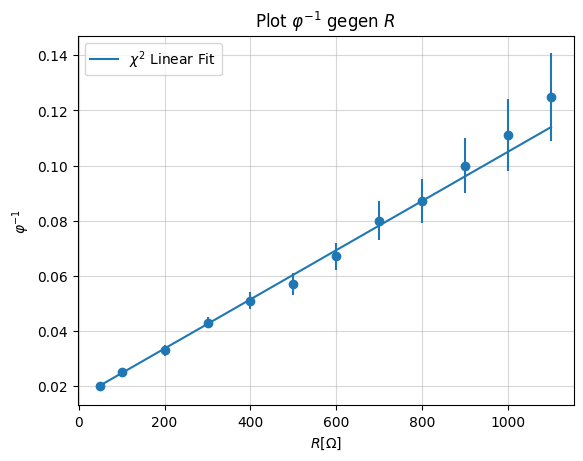

In [375]:
# Grapfit plot
x_index = "R[ohm]";
y_index = "1/phi";

plot = plt.subplots();
fig, ax = plot;

func, params = GraphFit.Linear.on_data(c_data, x_index, y_index, plot);

ax.grid(alpha=0.5);
ax.set_title(r"Plot $\varphi^{-1}$ gegen $R$")
ax.set_xlabel(r"$R [\Omega]$");
ax.set_ylabel(r"$\varphi^{-1}$")
ax.lines[1].set_label(r"$\chi^2$ Linear Fit")
ax.legend(loc="upper left")

fig.savefig("./output/236c_fit.pdf", dpi=300);
fig.show();

print("Parameter: \n", params);

#### 236.d

Messen Sie für 5 sinvoll ausgewählte Messpunkte (R Werte) mit einem DMM an geeigneter Stelle in der Schaltung direkt den Strom den auch vom Galvanometer gemessen wird. Bestimmen Sie daraus die Stromempfindlichkeit.

In [376]:
d_df

,I[A],ΔI[A],R[ohm],ΔR[ohm],phi[skt],Δphi[skt]
0,0.000018,1.770000e-07,1100.0,5.0,8.0,1.0
1,0.000021,2.070000e-07,900.0,5.0,10.0,1.0
2,0.000026,2.580000e-07,700.0,5.0,12.5,1.0
3,0.000035,3.460000e-07,500.0,5.0,17.5,1.0
4,0.000052,5.190000e-07,300.0,5.0,23.5,1.0


Betrachte die Gleichung

$$
\varphi = c_I \cdot I 
\quad\Leftrightarrow\quad
c_I = \frac{\varphi}{I}
$$

In [377]:
for dataset in d_data:
    index = "cI[1/A]"
    dataset[index] = dataset["phi[skt]"] / dataset["I[A]"]
    dataset[index] = dataset[index].round(-3);

d_data.save_to_excel("./output/236d_data");

m: (451.321 ±  36.367)e+3 [⋅], n: (697.193 ± 1183.836)e-3 [⋅]


C:\Users\flhir\AppData\Local\Temp\ipykernel_61336\1398267330.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


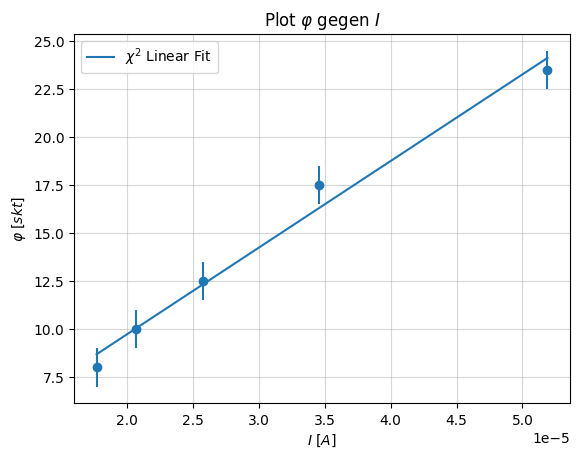

In [378]:
plot = plt.subplots();
fig, ax = plot;

d_func, d_params = GraphFit.Linear.on_data(d_data, "I[A]", "phi[skt]", plot);
print(d_params)

ax.grid(alpha=.5, which="major")
ax.set_xlabel(r"$I$ $[A]$")
ax.set_ylabel(r"$\varphi$ $[skt]$")
ax.set_title(r"Plot $\varphi$ gegen $I$")
ax.lines[1].set_label(r"$\chi^2$ Linear Fit")
ax.legend()

fig.savefig("./output/236d_fit.pdf", dpi=300);
fig.show();

In [379]:
d_cI_1 = d_data.mean()["cI[1/A]"];
print(d_cI_1);

(475.600 ±  18.493)e+3 [⋅]


In [380]:
d_cI = 0.5 * (d_params["m"] + d_cI_1)
print(d_cI)

(463.460 ±  20.400)e+3 [⋅]


#### 236.e

Bestimmen Sie aus der Steigung der Fit-Geraden die Stromempfindlichkeit $𝑐_𝐼$ .Vergleichen Sie den Wert mit den direkt gemessenen Werten.

Die Gleichung lautet

$$
\frac{1}{\varphi} = \frac{R_1 + R_2}{c_I U_0 R_2} (R_g + R) = \frac{R_1 + R_2}{c_I U_0 R_2} \cdot R + \frac{R_1 + R_2}{c_I U_0 R_2} \cdot R_g
$$

Damit entspricht die Formel einer Geraden $y= mx + b$ mit

$$
m = \frac{R_1 + R_2}{c_I U_0 R_2}
$$

woraus folgt

$$
c_I = \frac{R_1 + R_2}{m U_0 R_2}
$$

In [381]:
# define function to calculate the "Stromempfindlichkeit"
def d_calc_cI(r1, r2, u0, m):
    a = r1 + r2;
    b = m * u0 * r2;
    return a / b;

In [382]:
print(params["m"])

( 89.352 ±   3.845)e-6 [⋅]


In [383]:
e_cI = d_calc_cI(c_R_1, c_R_2, U_0, params["m"]);

print(e_cI)

(512.919 ±  27.009)e+3 [⋅]


In [384]:
e_diff = (d_cI / e_cI).value;
print(e_diff);
e_abweichung = e_diff - 1;
e_abweichung_percent = np.round(e_abweichung * 100, 2);
e_abweichung_text = "{0}%".format(e_abweichung_percent)
print(e_abweichung_text);

0.9035750579138235
-9.64%


#### 236.f

Bestimmen Sie den Widerstand der Galvanometerspule $R_g$ aus dem $y$-Achsenabschnitt der Fit-Geraden, wenn die Daten gemäß Gleichung 236.18 aufgetragen sind. Andernfalls wählen Sie den äquivalenten Achsenabschnitt

Die Gleichung lautet

$$
\frac{1}{\varphi} = \frac{R_1 + R_2}{c_I U_0 R_2} (R_g + R) = \frac{R_1 + R_2}{c_I U_0 R_2} \cdot R + \frac{R_1 + R_2}{c_I U_0 R_2} \cdot R_g
$$

Damit entspricht die Formel einer Geraden $y= mx + b$ mit

$$
b = \frac{R_1 + R_2}{c_I U_0 R_2} \cdot R_g
$$

woraus folgt

$$
R_g = b \cdot \frac{c_I U_0 R_2}{R_1 + R_2}
$$

In [385]:
print(params["n"])

( 15.691 ±   0.838)e-3 [⋅]


In [386]:
f_cI = (d_cI + e_cI) / 2
print(f_cI);

(488.189 ±  16.924)e+3 [⋅]


In [387]:
def f_calc_Rg(r1, r2, u0, cI, b):
    x = b * cI * u0 * r2;
    y = r1 + r2;
    return x / y;

In [388]:
f_R_g = f_calc_Rg(c_R_1, c_R_2, U_0, f_cI, params["n"]);

print(f_R_g, g_R_g);
print(f"Abweichung", (f_R_g / g_R_g).value);

(167.144 ±  11.789) [⋅] (105.000 ±  10.000) [ohm]
Abweichung 1.5918436888045828


#### 236.g

Messen Sie 𝑅g mit einem DMM oder einem Unigor und vergleichen Sie die Ergebnisse.

#### 236.h

#### 236.i

Die halblogarithmische Darstellung der so gemessenen Funktion $\varphi_m(\Delta t) = f(\Delta t)$ ist eine Gerade. Die Steigung der Fit-Geraden liefert die Zeitkonstante $R_x C$, und damit $R_x$. Die Auswertung soll grafisch geschehen. 

Frage: Warum braucht man den Maximalausschlag 𝜑𝑚 nicht in Restladung 𝑞 auf dem Kondensator umzurechnen?

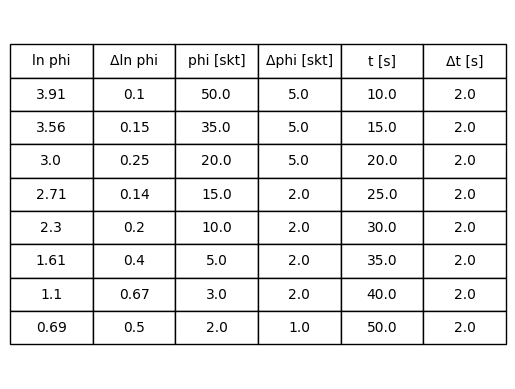

In [389]:
for dataset in i_data:
  index = "phi [skt]";
  value = np.log(dataset[index].value);
  error = dataset[index].error / dataset[index].value;
  unit = dataset[index].unit;
  dataset["ln phi"] = Measurement(value, error, unit).round(2);

# i_data.save_to_excel("./output/236i_data");

plot, table = i_data.plot_table()
table.scale(1, 2)
fig, ax = plot;
fig.savefig("./output/236i_data.pdf");

#i_df = i_data.sort("t [s]").get_markdownTable();
#i_df

m: (-83.375 ±   7.082)e-3 [⋅], n: (  4.761 ±   0.143) [⋅]


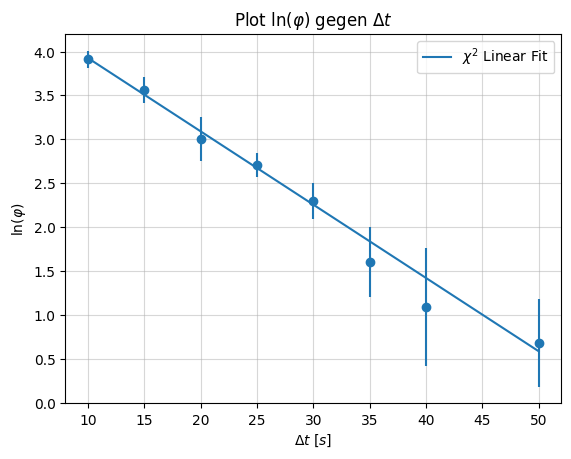

In [390]:
plot = plt.subplots();
fig, ax = plot;

i_func, i_params = GraphFit.Linear.on_data(i_data, "t [s]", "ln phi", plot);
print(i_params)

ax.set_xlabel(r"$\Delta t$ $[s]$")
ax.set_ylabel(r"$\ln(\varphi)$")
ax.grid(alpha=.5);
ax.lines[1].set_label(r"$\chi^2$ Linear Fit")
ax.legend()

ax.set_title(r"Plot $\ln(\varphi)$ gegen $\Delta t$")

fig.savefig("./output/236i_fit.pdf", dpi=300);

Betrachten wir Gleichung 236.23

$$
q = q_0 \cdot e^{-\frac{t}{RC}} \tag{236.23}
$$

Setzen wir q in Gleichung 236.27 ein:

$$
\varphi_m = \frac{G}{\sqrt{D\Theta}} q = \frac{G}{\sqrt{D \Theta}} \cdot e^{-\frac{t}{RC}} \tag{236.23}
$$

Nehmen wir den natürlichen Logarithmus

$$
\ln \left( \varphi_m \right) = \ln \left(\frac{G}{\sqrt{D \Theta}} \cdot e^{-\frac{t}{RC}} \right)
$$

Nutzen wir $\ln(ab) = \ln(a) + \ln(b)$

$$
\ln \left( \varphi_m \right) = \ln \left(\frac{G}{\sqrt{D \Theta}}\right) + \ln \left( e^{-\frac{t}{RC}} \right)
$$

und das ist einfach:

$$
\ln \left( \varphi_m \right) = \ln \left(\frac{G}{\sqrt{D \Theta}}\right) - \frac{1}{RC} \cdot t
$$

wir erkennen eine Gerade mit 

$$ 
m = - \frac{1}{RC} 
\quad \text{und} \quad
b = \ln \left(\frac{G}{\sqrt{D \Theta}}\right)
$$

Also können wir $R_x$ mit der Steigung $m$ und der Capacität $C$ berechnen:

$$
\Leftrightarrow R = - \frac{1}{m C}
$$

In [391]:
def i_calc_Rx(m, C):
  return -1 / (m * C);

In [392]:
i_m = i_params["m"];
print(i_m);
print(i_capacity);

(-83.375 ±   7.082)e-3 [⋅]
( 10.000 ±   0.100)e-6 [F]


In [393]:
i_R_x = i_calc_Rx(i_m, i_capacity);
print(i_R_x)

(  1.199 ±   0.103)e+6 [⋅]


#### 236.j

Messen Sie den Widerstand $R_x$ mit einem DMM und vergleichen Sie die Ergebnisse. Nehmen Sie für die Kapazität des Kondensators eine sinvolle Ungenauigkeit an.

Mit dem DMM haben wir für $R_x$ gemessen:

In [394]:
print(j_R_x)

(  1.210 ±   0.010)e+6 [ohm]


In 236.i haben wir rausbekommen:

In [395]:
print(i_R_x)

(  1.199 ±   0.103)e+6 [⋅]


Damit ergibt sich eine Abweichung von:

In [396]:
j_diff = (i_R_x / j_R_x).value
print(j_diff);
j_abweichung = j_diff - 1;
j_abweichung_percent = np.round(j_abweichung * 100, 2);
j_abweichung_text = "{0}%".format(j_abweichung_percent)
print(j_abweichung_text);

0.9912359874578481
-0.88%
